# 1. Titanic veya Iris gibi basit bir verisetinde karar ağaçları ile sınıflama işlemini yapınız.

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
from seaborn import load_dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
clf = tree.DecisionTreeClassifier()
iris = load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=3, criterion = "entropy")
clf = clf.fit(X_train, y_train)

## Gain Ratio

Veri kumesi icerisindeki niteliklerden her birinden elde ettigimiz bilgi kazanci oranidir. Bir nitelik diger nitekliklere kiyasa veya kendi degerleri arasinda, ne kadar varyansi yuksek ise o kadar cok bilgi veriyor demektir.

Decision tree algoritmasinda dallanmayi yaparken kullanilan metriklerden birisidir. Gini gibi baska metrikler de vardir.

 
-------------------------
This value represents the potential information generated by splitting the training
data set, D, into v partitions, corresponding to the v outcomes of a test on attribute A.

GainRatio(A) = Gain(A)/SplitInfoA(D)

The attribute with the maximum gain ratio is selected as the splitting attribute.

An attribute called income which has values namely low, medium, and high, containing four, six, and
four tuples, respectively.

first calculate Gain of the attribute with

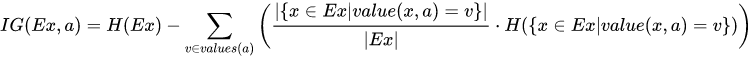

Gain(income) = 0.029

Then calculate SplitInfo of the attribute

SplitInfoincome(D) = -4/14 x log2(4/14) - 6/14 x log2(6/14) - 4/14 x log2(4/14) = 1.557

So GainRatio(income) = 0.029/1.557 = 0.019 


Ref: Han, J., Kamber, M., & Pei, J. (2012). Data mining: Concepts and techniques, third edition (3rd ed.). Morgan Kaufmann Publishers.



# Confusion Matrix

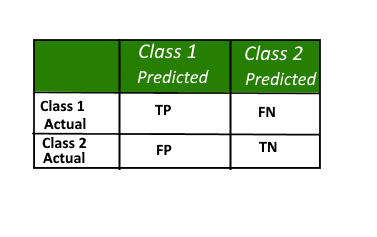

### Doğruluk (accuracy)
TP +TN/P +N

modelin hem pozitif hem de negatif ornekler uzerindeki basarisi

### Kesinlik (precision)
TP/TP +FP

modelin pozitif tahmin ettiklerinin guvenilirligi

### Duyarlılık (sensitivity)
TP/p

modelin gercekteki pozitifleri bilmedeki duyarliligi
### Özgüllük (specificity)
TN/N
modelin gercekteki pozitif orneklerdeki hata orani

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Oluşturulan Karar ağacının çizdirilmesini sağlayınız

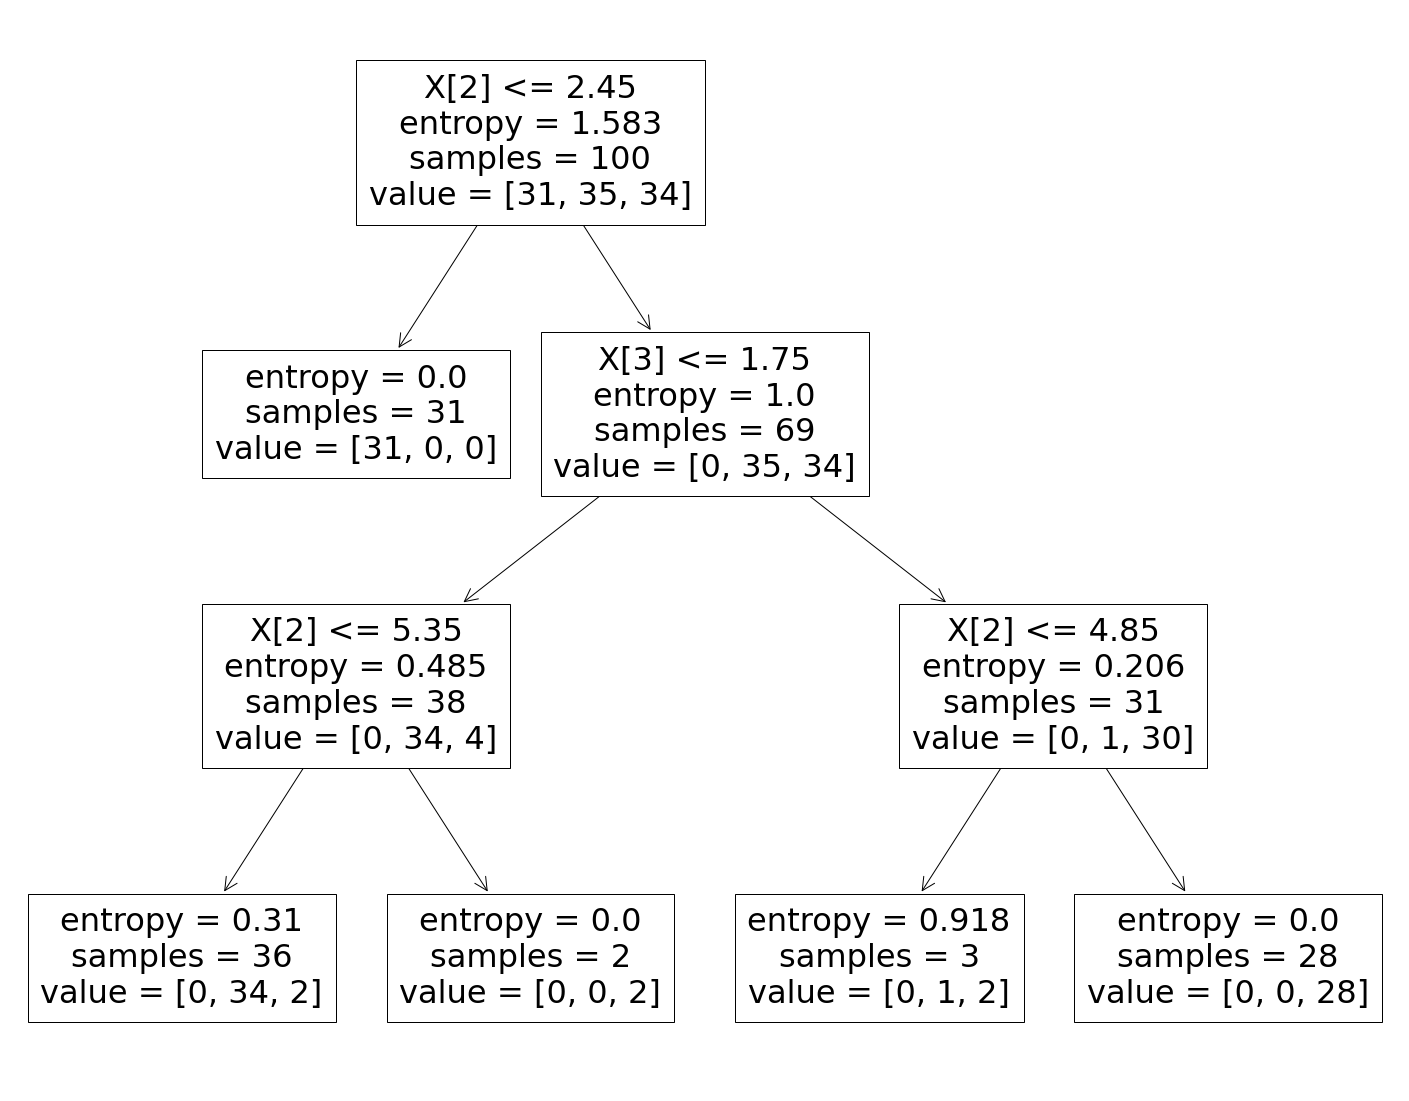

In [7]:
fig = plt.figure(figsize=(25,20)) 
temp = tree.plot_tree(clf)

# 2. Titanic için birliktelik kuralları oluşturarak, güven(Confidence), destek(Support) ve lift  değerlerinin açıklayınız.

# Farklı güven ve destek eşik değerleri ile oluşturduğunuz kuralları listeleyiniz ve görselleştiriniz.

Destek: itemin toplamda gecerli oldugu oran. i/I

Guven: İki itemin ayni anda bulunma oranidir.

Lift(i1,i2) = (Confidence (i1,i2))/(Support (i2)): i1 varken i2'nin artmasi

In [8]:
# install apyori
!pip install apyori

In [9]:
from apyori import apriori

In [10]:
titanic_data = load_dataset("titanic")

In [11]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# cherry picking columns
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
col2= ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'deck', 'adult_male', 'alone']
titanic_data_2 = titanic_data.drop(col2, axis=1)

In [14]:
titanic_data_2

,sex,embarked,class,who,embark_town,alive
0,male,S,Third,man,Southampton,no
1,female,C,First,woman,Cherbourg,yes
2,female,S,Third,woman,Southampton,yes
3,female,S,First,woman,Southampton,yes
4,male,S,Third,man,Southampton,no
...,...,...,...,...,...,...
886,male,S,Second,man,Southampton,no
887,female,S,First,woman,Southampton,yes
888,female,S,Third,woman,Southampton,no
889,male,C,First,man,Cherbourg,yes


In [15]:
titanic_data_2.isnull().sum()

sex            0
embarked       2
class          0
who            0
embark_town    2
alive          0
dtype: int64

In [16]:
titanic_data_3 = titanic_data_2.dropna(axis=0)

In [17]:
titanic_data_3.isnull().sum()

sex            0
embarked       0
class          0
who            0
embark_town    0
alive          0
dtype: int64

In [18]:
transactions = [[it for it in t if it] for t in titanic_data_3.values.tolist()]

In [19]:
association_rules = apriori(transactions, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [20]:
print(len(association_results))

230


In [21]:
results = pd.DataFrame(association_results)
results.head(5)

,items,support,ordered_statistics
0,"(Cherbourg, C)",0.188976,"[((C), (Cherbourg), 1.0, 5.291666666666667), (..."
1,"(Q, Queenstown)",0.086614,"[((Q), (Queenstown), 1.0, 11.545454545454545),..."
2,"(Cherbourg, First, C)",0.095613,"[((C), (Cherbourg, First), 0.505952380952381, ..."
3,"(Cherbourg, C, Second)",0.019123,"[((C, Second), (Cherbourg), 1.0, 5.29166666666..."
4,"(Cherbourg, Third, C)",0.074241,"[((C), (Cherbourg, Third), 0.39285714285714285..."


In [22]:
def printRules(association_results):
    for item in association_results:
    
        # first index of the inner list
        # Contains base item and add item
        pair = item[0] 
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])
    
        #second index of the inner list
        print("Support: " + str(item[1]))
    
        #third index of the list located at 0th
        #of the third index of the inner list
    
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

In [23]:
print(len(association_results))

230


#### try to reduce number of rules

In [24]:
association_rules = apriori(transactions, min_support=0.045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)
print(len(association_results))

80


In [33]:
association_rules = apriori(transactions, min_support=0.075, min_confidence=0.5, min_lift=5, min_length=2)
association_results = list(association_rules)
print(len(association_results))

10


In [25]:
association_rules = apriori(transactions, min_support=0.075, min_confidence=0.35, min_lift=6, min_length=2)
association_results = list(association_rules)
print(len(association_results))

3


In [268]:
printRules(association_results)

Rule: Queenstown -> Q
Support: 0.08661417322834646
Confidence: 1.0
Lift: 11.545454545454545
Rule: Third -> Queenstown
Support: 0.08098987626546682
Confidence: 0.935064935064935
Lift: 11.545454545454545
Rule: Cherbourg -> C
Support: 0.10123734533183353
Confidence: 0.9473684210526316
Lift: 9.357894736842105
